In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [17]:
# Download historical price data for assets
assets = ['VOO', 'EPD', 'JNJ', 'PLD', 'TSLA']  

In [18]:

data = yf.download(assets, start='2020-01-01', end='2023-01-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate expected returns and covariance matrix
expected_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Define risk-free rate
risk_free_rate = 0.0512  # 5.12% as a decimal

[*********************100%%**********************]  5 of 5 completed


In [19]:
# Define number of portfolios to simulate
num_portfolios = 100000
results = np.zeros((3, num_portfolios))
weight_array = np.zeros((num_portfolios, len(assets)))

# Simulate random portfolios
for i in range(num_portfolios):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    
    results[0, i] = portfolio_std_dev
    results[1, i] = portfolio_return
    results[2, i] = sharpe_ratio
    weight_array[i] = weights

# Extract the results
std_dev, portfolio_returns, sharpe_ratios = results

In [20]:
print(std_dev)
print(portfolio_return)
print(sharpe_ratio)

[0.27541564 0.33141947 0.28252328 ... 0.30927961 0.27483108 0.30349526]
0.2927696627103078
0.7959585942076961


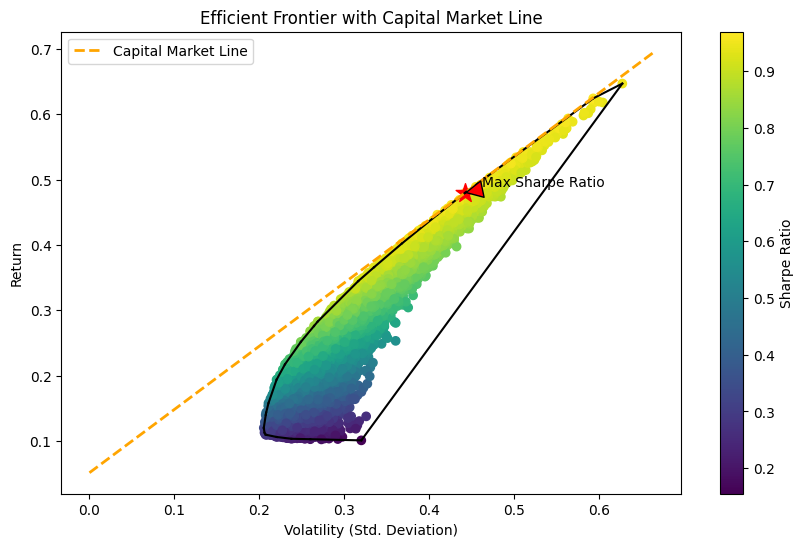

Max Sharpe Ratio Portfolio Weights: [0.00366314 0.34883425 0.06739481 0.57310234 0.00700546]


In [21]:
max_sharpe_idx = sharpe_ratios.argmax()
max_sharpe_std_dev = std_dev[max_sharpe_idx]
max_sharpe_return = portfolio_returns[max_sharpe_idx]
max_sharpe_weights = weight_array[max_sharpe_idx]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(std_dev, portfolio_returns, c=sharpe_ratios, cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')

# Plot the boundary of the efficient frontier
# Using scipy's convex hull for more accurate frontier
from scipy.spatial import ConvexHull
points = np.vstack((std_dev, portfolio_returns)).T
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# Highlight the maximum Sharpe ratio portfolio
plt.scatter(max_sharpe_std_dev, max_sharpe_return, c='red', marker='*', s=200)
plt.annotate('Max Sharpe Ratio', 
             xy=(max_sharpe_std_dev, max_sharpe_return), 
             xytext=(max_sharpe_std_dev + 0.02, max_sharpe_return + 0.01),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Plot the Capital Market Line (CML)
cml_x = np.array([0, max_sharpe_std_dev * 1.5])
cml_y = risk_free_rate + sharpe_ratios[max_sharpe_idx] * cml_x
plt.plot(cml_x, cml_y, color='orange', linestyle='dashed', linewidth=2, label='Capital Market Line')


# Plot customization
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier with Capital Market Line')
plt.legend()
plt.show()

# Display portfolio weights
print(f"Max Sharpe Ratio Portfolio Weights: {max_sharpe_weights}")